In [1]:
##Import the Libraries and classifiers as needed for various models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA

In [2]:
###import sklearn metrics to determine model characteristcs

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [3]:
#Read Dataset and check for any missing variables across columns
df = pd.read_csv("../input/data.csv")

In [4]:
df.shape  ## (569,33)

(569, 33)

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#Drop columns which are not needed based on the summary from above

df = df.drop(['id','Unnamed: 32'], axis=1)

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [8]:
#####Seperating the features/Predictors

X = df.loc[:, df.columns != 'diagnosis']

In [9]:
X.shape

(569, 30)

In [10]:
# 3.1 Separating out the target

y = df.loc[:,['diagnosis']].values

In [11]:
y.shape         # (569,1)

(569, 1)

In [12]:
## Map values in ' y ' (target) from 'M' and 'B' to 1 and 0, as integers,

df['diagnosis'].value_counts()
y[y=='M'] = 1
y[y=='B'] = 0

In [13]:
y=y.astype('int64')

In [14]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [15]:
####Scale all numerical features in X  using sklearn's StandardScaler class
scale = ss()
X = scale.fit_transform(X)

In [16]:
X.shape

(569, 30)

In [17]:
#####Perform PCA on numeric features, X. Use sklearn's PCA class. Only retain as many principal components (PCs) 
##as needed to achieve 95% variance
pca = PCA()
out = pca.fit_transform(X)

In [18]:
out.shape

(569, 30)

In [19]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [20]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [21]:
###Based on cumsum, first 10 PCs result in 95% Variance, hence we can drop rest of the columns to get new_X
X = out[:,:10]

In [22]:
y = y.ravel() # for appropriate sizing

In [23]:
####Split X and y into test and train datasets at 80:20 ratio  
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = True
                                                    )

In [24]:
X_train.shape

(455, 10)

In [25]:
X_test.shape

(114, 10)

In [26]:
###Create the Default Classifiers using various models

dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
et = ExtraTreesClassifier(n_estimators=100)
gbm = GradientBoostingClassifier()
xg = XGBClassifier(learning_rate=0.5,
                   reg_alpha= 5,
                   reg_lambda= 0.1)
knn = KNeighborsClassifier()

In [27]:
#fit the train data into each of these models

dt1 = dt.fit(X_train,y_train)
rf1 = rf.fit(X_train,y_train)
et1 = et.fit(X_train,y_train)
gbm1 = gbm.fit(X_train,y_train)
xg1 = xg.fit(X_train,y_train)
knn1 = knn.fit(X_train,y_train)

In [28]:
####Use these trained models on actual test data and check the predictions
y_pred_dt = dt1.predict(X_test)
y_pred_rf = rf1.predict(X_test)
y_pred_et = et1.predict(X_test)
y_pred_gbm = gbm1.predict(X_test)
y_pred_xg = xg1.predict(X_test)
y_pred_knn = knn1.predict(X_test)

In [29]:
###Probability Values for each of these models
y_pred_dt_prob = dt1.predict_proba(X_test)
y_pred_rf_prob = rf1.predict_proba(X_test)
y_pred_et_prob = et1.predict_proba(X_test)
y_pred_gbm_prob = gbm1.predict_proba(X_test)
y_pred_xg_prob = xg1.predict_proba(X_test)
y_pred_knn_prob = knn1.predict_proba(X_test)

In [30]:
#Calucate accuracy of these models for comparision
print("The Accuracy Score of Decision Tree Classifier is")
print(accuracy_score(y_test,y_pred_dt))
print("The Accuracy Score of Random Forest Classifier is")
print(accuracy_score(y_test,y_pred_rf))
print("The Accuracy Score of Extra Trees Classifier is")
print(accuracy_score(y_test,y_pred_et))
print("The Accuracy Score of Gradient Boosting Machine Classifier is")
print(accuracy_score(y_test,y_pred_gbm))
print("The Accuracy Score of XG Boost Classifier is")
print(accuracy_score(y_test,y_pred_xg))
print("The Accuracy Score of KNeighbors Classifier is")
print(accuracy_score(y_test,y_pred_knn))

The Accuracy Score of Decision Tree Classifier is
0.9210526315789473
The Accuracy Score of Random Forest Classifier is
0.9122807017543859
The Accuracy Score of Extra Trees Classifier is
0.9122807017543859
The Accuracy Score of Gradient Boosting Machine Classifier is
0.9210526315789473
The Accuracy Score of XG Boost Classifier is
0.9035087719298246
The Accuracy Score of KNeighbors Classifier is
0.956140350877193


In [31]:
#Determine the Confusion matrix for these models
print("The Confusion Matrix of Decision Tree Classifier is")
print(confusion_matrix(y_test,y_pred_dt))
print("The Confusion Matrix of Random Forest Classifier is")
print(confusion_matrix(y_test,y_pred_rf))
print("The Confusion Matrix of Extra Trees Classifier is")
print(confusion_matrix(y_test,y_pred_et))
print("The Confusion Matrix of Gradient Boosting Machine Classifier is")
print(confusion_matrix(y_test,y_pred_gbm))
print("The Confusion Matrix of XG Boost Classifier is")
print(confusion_matrix(y_test,y_pred_xg))
print("The Confusion Matrix of KNeighbors Classifier is")
print(confusion_matrix(y_test,y_pred_knn))

The Confusion Matrix of Decision Tree Classifier is
[[63  2]
 [ 7 42]]
The Confusion Matrix of Random Forest Classifier is
[[64  1]
 [ 9 40]]
The Confusion Matrix of Extra Trees Classifier is
[[64  1]
 [ 9 40]]
The Confusion Matrix of Gradient Boosting Machine Classifier is
[[64  1]
 [ 8 41]]
The Confusion Matrix of XG Boost Classifier is
[[64  1]
 [10 39]]
The Confusion Matrix of KNeighbors Classifier is
[[65  0]
 [ 5 44]]


In [32]:
# Determine and print the Precision, Recall & F-score values
p_dt,r_dt,f_dt,_ = precision_recall_fscore_support(y_test,y_pred_dt)
print(" Precision, Recall and F-Score values of Decision Tree Classifier are ", p_dt,r_dt,f_dt)
p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf)
print(" Precision, Recall and F-Score values of Random Forest Classifier are ", p_rf,r_rf,f_rf)
p_et,r_et,f_et,_ = precision_recall_fscore_support(y_test,y_pred_et)
print(" Precision, Recall and F-Score values of Extra Trees Classifier are ", p_et,r_et,f_et)
p_gbm,r_gbm,f_gbm,_ = precision_recall_fscore_support(y_test,y_pred_gbm)
print(" Precision, Recall and F-Score values of Gradient Boosting Machine Classifier are ", p_gbm,r_gbm,f_gbm)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg)
print(" Precision, Recall and F-Score values of XG Boost Classifier are ", p_xg,r_xg,f_xg)
p_knn,r_knn,f_knn,_ = precision_recall_fscore_support(y_test,y_pred_knn)
print(" Precision, Recall and F-Score values of KNeighbors Classifier are ", p_knn,r_knn,f_knn)

 Precision, Recall and F-Score values of Decision Tree Classifier are  [0.9        0.95454545] [0.96923077 0.85714286] [0.93333333 0.90322581]
 Precision, Recall and F-Score values of Random Forest Classifier are  [0.87671233 0.97560976] [0.98461538 0.81632653] [0.92753623 0.88888889]
 Precision, Recall and F-Score values of Extra Trees Classifier are  [0.87671233 0.97560976] [0.98461538 0.81632653] [0.92753623 0.88888889]
 Precision, Recall and F-Score values of Gradient Boosting Machine Classifier are  [0.88888889 0.97619048] [0.98461538 0.83673469] [0.93430657 0.9010989 ]
 Precision, Recall and F-Score values of XG Boost Classifier are  [0.86486486 0.975     ] [0.98461538 0.79591837] [0.92086331 0.87640449]
 Precision, Recall and F-Score values of KNeighbors Classifier are  [0.92857143 1.        ] [1.         0.89795918] [0.96296296 0.94623656]


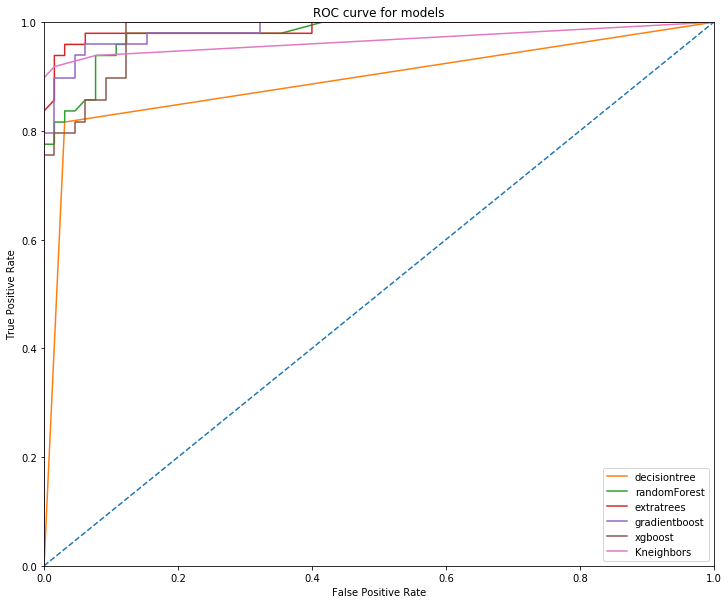

In [33]:
# Plotting Graph

Classifier_models = [(dt, "decisiontree"), (rf, "randomForest"), (et, "extratrees"), (gbm, "gradientboost"), (xg,"xgboost"), (knn,"Kneighbors")]

#  Plotting the ROC curve


fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Connecting diagonals and specifying Labels,Title

ax.plot([0, 1], [0, 1], ls="--")
ax.set_title('ROC curve for models')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')


# Setting x,y axes limits

ax.set_xlim([0.0, 1.0])

ax.set_ylim([0.0, 1.0])

AUC = []
for clf,name in Classifier_models:
    clf.fit(X_train,y_train)
    y_pred_prob = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test,
                                     y_pred_prob[: , 1],
                                     pos_label= 1
                                     )
    AUC.append((auc(fpr,tpr)))
    ax.plot(fpr, tpr, label = name)

ax.legend(loc="lower right")
plt.show()

In [34]:
print("The AUC values for DT Classifier, RF Classifier, ET Classifier, GBM Classifier, XG Boost Classifier, KNeighbors Classifier respectively are :",AUC)

The AUC values for DT Classifier, RF Classifier, ET Classifier, GBM Classifier, XG Boost Classifier, KNeighbors Classifier respectively are : [0.892778649921507, 0.9788069073783359, 0.9885400313971743, 0.9855572998430142, 0.9795918367346939, 0.965934065934066]


In [35]:
print(" Gradient Boost Classifier model has the best performance")

 Gradient Boost Classifier model has the best performance


In [36]:
print("Observation made from plot : The slower the increase in False Positive Rate from 0, the larger is the Area Under Curve")

Observation made from plot : The slower the increase in False Positive Rate from 0, the larger is the Area Under Curve
